In [10]:
# Import Libraries & Load data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Define the path to excel file
file_path = r"D:\Data Analysis\Main Projects\Customer churn\Data Sets\Prediction.xlsx"

In [3]:
# define the sheet name to read data from
sheet_name = 'churn'
# Read the data 
df = pd.read_excel(file_path,sheet_name=sheet_name)

In [6]:
# Data Processing
# Drop coloumns that won't be used for prediction
df = df.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)

# List of columns to be label encoded
columns_to_encode = [
        'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'

]

# Encode categorial variables expect target variabel
label_encoder = {}
for column in columns_to_encode:
    label_encoder[column] = LabelEncoder()
    df[column] = label_encoder[column].fit_transform(df[column])
# Manually encode the target variable "Customer status"
df['Customer_Status'] = df['Customer_Status'].map({'Stayed':0,"Churned":1})

# Split data into features and target 
X = df.drop('Customer_Status',axis=1)
y = df['Customer_Status']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)



In [7]:
df.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,0,30,1,11,0,31,0,1,0,1,...,2,0,0,95.099998,6683.399902,0.00,0,631.719971,7315.120117,0
1,1,51,0,15,5,9,4,1,0,1,...,0,1,0,49.150002,169.050003,0.00,10,122.370003,301.420013,1
2,0,43,1,21,3,28,0,1,1,1,...,2,1,0,116.050003,8297.500000,42.57,110,1872.979980,10237.900391,0
3,1,35,0,12,10,12,5,1,0,1,...,2,1,1,84.400002,5969.299805,0.00,0,219.389999,6188.689941,0
4,1,75,1,17,12,27,1,1,0,1,...,2,1,1,72.599998,4084.350098,0.00,140,332.079987,4556.430176,0


In [8]:
# Train Random Forest Model
# intialize the random forest clasiffier
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
# Train Model
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix: 
[[783  64]
 [126 229]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



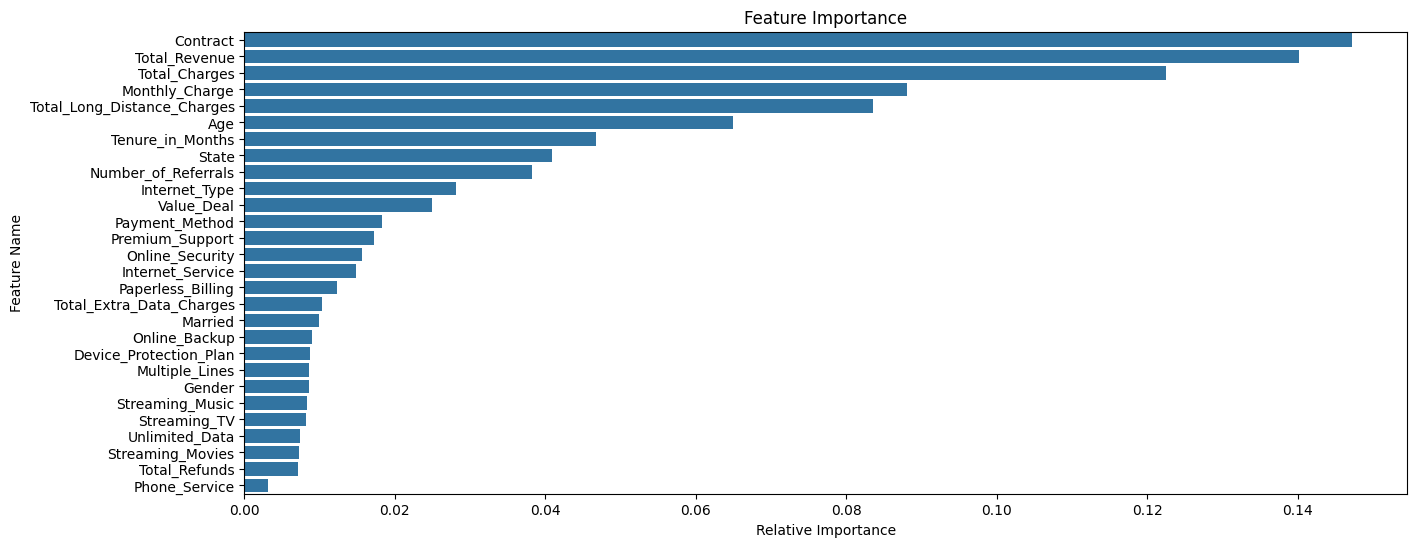

In [11]:
# Evaluate Model
# Make Prediction
y_pred = rf_model.predict(X_test)

# Evaluate the Model
print("Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred))
print("\nClassification Report: ")
print(classification_report(y_test,y_pred))

# Feature selection using feature importance
importance = rf_model.feature_importances_
indices = np.argsort(importance)[::-1]
# Plot the Feature importance
plt.figure(figsize=(15,6))
sns.barplot(x=importance[indices],y=X.columns[indices])
plt.title("Feature Importance")
plt.xlabel("Relative Importance")
plt.ylabel("Feature Name")
plt.show()

In [29]:
# Use Model for Prediction on New Data
# Define Path to the Joiner Data Excel file
file_path = r"D:\Data Analysis\Main Projects\Customer churn\Data Sets\Prediction.xlsx"
# Define sheet name
sheet_name = 'join'
# Read the data 
ndf = pd.read_excel(file_path,sheet_name=sheet_name)
# Display few rows
ndf.head()

# Retain the Original data frame to preserve unevecoded columns
orignal_df = ndf.copy()

# Retain customer id column
customer_ids = ndf['Customer_ID']

# Drop coloumns 
ndf = ndf.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical  variabbles

for column in ndf.select_dtypes(include=['object']).columns:
    ndf[column] = label_encoder[column].transform(ndf[column])

# Make Predictions
new_predictions = rf_model.predict(ndf)

# Add Predictions to the orignal data frame
orignal_df["Customer_Status_Predicted"] = new_predictions

# Fillter the data frame
orignal_df = orignal_df[orignal_df['Customer_Status_Predicted']==1]
# save the Results
orignal_df.to_csv(r"D:\Data Analysis\Main Projects\Customer churn\Data Sets")

PermissionError: [Errno 13] Permission denied: 'D:\\Data Analysis\\Main Projects\\Customer churn\\Data Sets'